In [23]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [24]:
train_dir = "dataset2/train"
test_dir = "dataset2/test"

In [25]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [26]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

Found 320 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


In [45]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

In [46]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [47]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 752ms/step - accuracy: 0.2213 - loss: 1.5202 - val_accuracy: 0.3625 - val_loss: 1.3708
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 597ms/step - accuracy: 0.3307 - loss: 1.3721 - val_accuracy: 0.5875 - val_loss: 1.3016
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 600ms/step - accuracy: 0.3219 - loss: 1.3352 - val_accuracy: 0.4250 - val_loss: 1.1858
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 579ms/step - accuracy: 0.4714 - loss: 1.2425 - val_accuracy: 0.5250 - val_loss: 1.0866
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 595ms/step - accuracy: 0.4252 - loss: 1.2056 - val_accuracy: 0.5375 - val_loss: 0.9816
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 568ms/step - accuracy: 0.5658 - loss: 1.0960 - val_accuracy: 0.6000 - val_loss: 0.8790
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 738ms/step - accuracy: 0.5778 - loss: 1.0332 - val_accuracy: 0.5125 - val_loss: 1.0443
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 955ms/step - accuracy: 0.5910 - loss: 1.0074 - val_accuracy: 0

In [48]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc*100}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 328ms/step - accuracy: 0.6719 - loss: 0.9671
Test accuracy: 68.75


In [49]:
from tensorflow.keras.preprocessing import image

In [50]:
def predict_vehicle_class(img_path):
    img = image.load_img(img_path, target_size=(64, 64))
    img = image.img_to_array(img)
    img_array = np.expand_dims(img, axis=0) / 255.0

    prediction = model.predict(img_array)
    class_idx = np.argmax(prediction)
    class_label = list(train_generator.class_indices.keys())[class_idx]

    plt.imshow(img)
    plt.title(class_label)
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


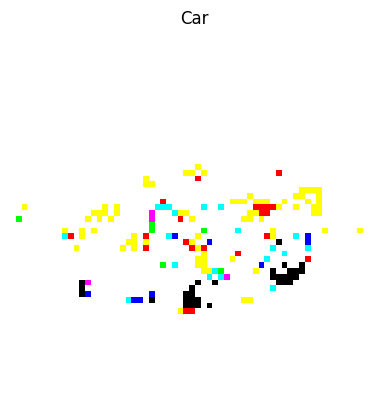

In [51]:
predict_vehicle_class('test_img/vehicle.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


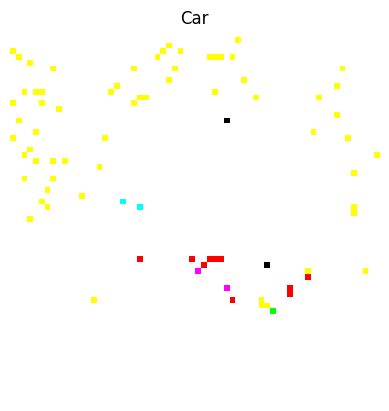

In [52]:
predict_vehicle_class('test_img/images.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


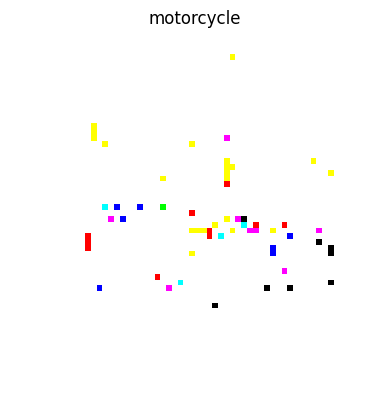

In [53]:
predict_vehicle_class('test_img/images1.jpg')